<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/graph_rag_NEO4J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install langchain-experimental langchain-community langchain networkx langchain-google-genai langchain-core json-repair

In [2]:
# import os
# import time
# import networkx as nx
# import google.generativeai as genai
# from langchain_experimental.graph_transformers import LLMGraphTransformer
# from langchain_google_genai import GoogleGenerativeAI
# from langchain.chains import GraphQAChain
# from langchain_core.documents import Document
# from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

In [3]:
# import google.generativeai as genai
# from google.colab import userdata

# GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
# genai.configure(api_key=GOOGLE_API_KEY)
# llm = GoogleGenerativeAI(model="gemini-pro", google_api_key=GOOGLE_API_KEY)

In [4]:
# # Input text
# doc_text = """
# A traveler, John Doe, lost his black Samsonite suitcase at JFK Airport on February 20th.
# He last saw it at the security checkpoint in Terminal 4 before proceeding to Gate B22 for his flight to London.
# The suitcase contains important documents, a laptop, and personal belongings.
# Airport security reviewed footage from multiple CCTV cameras along the route from security to the boarding gate.
# It was last seen near a coffee shop in the terminal before disappearing from view.
# The airport authorities are investigating whether it was misplaced, stolen, or mistakenly taken by another passenger.
# """

# documents = [Document(page_content=doc_text)]

In [5]:
# # Initialize the Graph Transformer
# llm_transformer = LLMGraphTransformer(llm=llm)
# graph_documents = llm_transformer.convert_to_graph_documents(documents)

# # Filter Graph Transformer
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=["Person", "Item", "Location", "Event"],
#     allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS"],
# )
# graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# # Create NetworkX Graph
# graph = NetworkxEntityGraph()

In [6]:
# # Add nodes to the graph
# for node in graph_documents_filtered[0].nodes:
#     graph.add_node(node.id)

# # Add edges to the graph
# for edge in graph_documents_filtered[0].relationships:
#     graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)


In [7]:
# # Initialize the GraphQAChain
# chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

In [8]:
# # Query the graph
# question = "Where was john doe's suitcase seen?"
# response = chain.run(question)
# print(response)

In [9]:
!pip install langchain-experimental langchain-community langchain networkx langchain-google-genai langchain-core json-repair matplotlib neo4j pyvis

In [10]:
import os
import time
import networkx as nx
import requests
import matplotlib.pyplot as plt
import json
import google.generativeai as genai
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_google_genai import GoogleGenerativeAI
from langchain.chains import GraphQAChain  # Fixed import
from langchain_core.documents import Document
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

In [11]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
llm = GoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=GOOGLE_API_KEY)

In [12]:
# Input text - Lost suitcase scenario
text = """
A black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM
"""

documents = [Document(page_content=text)]

In [13]:
# Initialize the Graph Transformer
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [14]:
response = requests.get("http://34.136.67.113:1234/getAllClassNames")
data = response.json()
classNames = data["classNames"]
print("Allowed Class Names:", classNames)

Allowed Class Names: ['arachnid', 'armadillo', 'bear', 'bird', 'bug', 'butterfly', 'cat', 'coral', 'crocodile', 'crustacean', 'dinosaur', 'dog', 'echinoderms', 'ferret', 'fish', 'flower', 'frog', 'fruit', 'fungus', 'hog', 'lizard', 'marine mammals', 'marsupial', 'mollusk', 'mongoose', 'monotreme', 'person', 'plant', 'primate', 'rabbit', 'rodent', 'salamander', 'shark', 'sloth', 'snake', 'trilobite', 'turtle', 'ungulate', 'vegetable', 'wild cat', 'wild dog', 'accessory', 'aircraft', 'ball', 'boat', 'building', 'clothing', 'container', 'cooking', 'decor', 'electronics', 'fence', 'food', 'furniture', 'hat', 'instrument', 'lab equipment', 'other', 'outdoor scene', 'paper', 'sports equipment', 'technology', 'tool', 'toy', 'train', 'vehicle', 'weapon', 'croodile']


In [15]:
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=classNames,
# )
# graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

In [16]:
# Create NetworkX Graph
graph = NetworkxEntityGraph()

In [17]:
# # Manually add nodes and edges
# for doc in graph_documents_filtered:
#     for node in doc.nodes:
#         graph._graph.add_node(node.id, type=node.type)
#     for edge in doc.relationships:
#         graph._graph.add_edge(edge.source?.id, edge.target.id, relation=edge.type)

In [18]:
# AUTOMATIC NODE GEN

for doc in graph_documents:
    for node in doc.nodes:
        graph._graph.add_node(node.id, label=node.type)
    for edge in doc.relationships:
        graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

In [19]:
# Debug: Print extracted graph structure
print("\nExtracted Graph Documents:\n", graph_documents)
print("\nGenerated Graph Nodes:", graph._graph.nodes(data=True))
print("\nGenerated Graph Edges:", graph._graph.edges(data=True))




Extracted Graph Documents:
 [GraphDocument(nodes=[Node(id='security checkpoint', type='Location', properties={}), Node(id='Terminal 4', type='Location', properties={}), Node(id='black suitcase', type='Object', properties={}), Node(id='JFK Airport', type='Location', properties={})], relationships=[Relationship(source=Node(id='black suitcase', type='Object', properties={}), target=Node(id='JFK Airport', type='Location', properties={}), type='LOCATED_AT', properties={}), Relationship(source=Node(id='black suitcase', type='Object', properties={}), target=Node(id='security checkpoint', type='Location', properties={}), type='LAST_SEEN', properties={}), Relationship(source=Node(id='security checkpoint', type='Location', properties={}), target=Node(id='Terminal 4', type='Location', properties={}), type='LOCATED_IN', properties={})], source=Document(metadata={}, page_content='\nA black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM\n'))]

Genera

In [20]:
# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

In [21]:
question = f"Based on this, {graph_documents}. Where was the suitcase seen"
response = chain.run(question)
print("\nGraph Query Response:", response)



> Entering new GraphQAChain chain...


<ipython-input-21-a4b9414d050a>:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = chain.run(question)


Entities Extracted:
JFK Airport, Terminal 4
Full Context:


> Finished chain.

Graph Query Response: The suitcase was last seen at the security checkpoint.


In [22]:
question = f"Using the provided {graph_documents}, generate a relevant className to categorize the given item. Then, check if this className matches any existing category in {classNames}. If no match is found, suggest a meaningful and appropriate class name based on the item's characteristics. Provide a single word answer"
selectedClassName = chain.run(question)
print("\nGraph Query Response:", selectedClassName)




> Entering new GraphQAChain chain...
Entities Extracted:
GraphDocument, Node, Location, Terminal 4, Object, JFK Airport, Relationship, Document
Full Context:


> Finished chain.

Graph Query Response: container


In [23]:
import requests
response=requests.get(f"http://34.136.67.113:1234/getCategoriesByClassName?className={selectedClassName}")
data=response.json();
categories = data.get("categories", [])
print(categories)

['luggage']


In [24]:
question = f"Based on {graph_documents} and the class name {selectedClassName}, select the single best category from {categories} that best fits our item. If none of the existing categories are suitable, create a broad and meaningful category that falls under the class name {selectedClassName}. The category name should be in snake_case format (lowercase with underscores) and can be one or two words. Ensure that the class name and category name are not the same.Give one word answer"
selectedCategoryName = chain.run(question)
print("\nGraph Query Response:", selectedCategoryName)



> Entering new GraphQAChain chain...
Entities Extracted:
GraphDocument, Node, Location, Terminal 4, Object, JFK Airport, Relationship, Document
Full Context:


> Finished chain.

Graph Query Response: luggage


In [25]:


# Generate the metadata
question = f"""
Given the following data:
- Selected Category Name: {selectedCategoryName}
- Selected Class Name: {selectedClassName}
- Graph Documents: {graph_documents}

Please generate the body for the API request to the `/generateEntry` endpoint. The metadata should be a JSON object containing:
1. Key-value pairs extracted from the document, segregated based on the properties of the item, such as:
   - "color"
   - "shape"
   - "size"
   - And any other relevant attributes.
2. A key called `metadata` that contains the full textual content of the document in a single paragraph without any blank lines.

Format the body as a JSON object.
"""

metadata = chain.run(question)
print("Generated Metadata:")
print(metadata)

# Step 1: Clean the metadata string (remove code block markers if present)
metadata = metadata.strip().strip("```json").strip("```").strip()

# Step 2: Parse the metadata string into a Python dictionary
try:
    metadata_dict = json.loads(metadata)
except json.JSONDecodeError as e:
    print(f"Failed to parse metadata as JSON: {e}")
    metadata_dict = {}

# Prepare the request body
print("Request Body:")
print(metadata_dict)





> Entering new GraphQAChain chain...
Entities Extracted:
JFK Airport, Terminal 4
Full Context:


> Finished chain.
Generated Metadata:
```json
{
  "category": "luggage",
  "class_name": "container",
  "metadata": {
    "color": "black",
    "metadata": "A black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM"
  }
}
```
Request Body:
{'category': 'luggage', 'class_name': 'container', 'metadata': {'color': 'black', 'metadata': 'A black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM'}}


In [26]:
import requests
import json

# Define the API URL
api_url = f"http://34.136.67.113:1234/generateEntry?className={selectedClassName}&categoryName={selectedCategoryName}"
response = requests.post(api_url, timeout=10)
data = response.json()

# Use the element ID of the Entry node
generated_element_id = data["element_id"]

In [27]:


# Define the prompt for generating the Cypher query
prompt = f"""
Given the following metadata dictionary:
{metadata}

Generate a Cypher query to create nodes and relationships in a Neo4j database based on the metadata. Follow these rules:
1. For each key-value pair in the metadata (except the `metadata` key), create a node with the following properties:
   - `id`: A unique identifier (use the key name).
   - `type`: The key name (e.g., "color", "shape").
   - `value`: The value associated with the key.
2. Create a relationship between the `Entry` node (with elementId: "{generated_element_id}") and each of these nodes.
3. The `metadata` key should be stored as a property of the `Entry` node.

Return only the Cypher query.
"""

# Generate the Cypher query using the chain
cypher_query = chain.run(prompt)
print("\nGraph Query Response:", cypher_query)



> Entering new GraphQAChain chain...
Entities Extracted:
JFK Airport, Terminal 4
Full Context:


> Finished chain.

Graph Query Response: ```cypher
MATCH (e:Entry) WHERE elementId(e) = "4:bbc0cf5b-04b8-41ed-ae87-9d2c891c4da3:92"
WITH e
SET e.metadata = "A black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM"
WITH e
CREATE (c:Color {id: "color", type: "color", value: "black"})
CREATE (e)-[:HAS_ATTRIBUTE]->(c)
```


In [28]:
from neo4j import GraphDatabase
import os

# Neo4j connection details
NEO4J_URI = os.getenv("NEO4J_URI", "neo4j+s://a28c510a.databases.neo4j.io")  # Removed extra space
NEO4J_USER = os.getenv("NEO4J_USER", "neo4j")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD", "vTEJ9e3B3C5gf38onxFbhdqU8elzxvB79vprKDxjbLU")

# Initialize Neo4j driver
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

# Function to clean the Cypher query (remove Markdown syntax)
def clean_cypher_query(query):
    # Remove ```cypher and ``` markers
    if query.startswith("```cypher") and query.endswith("```"):
        query = query[len("```cypher"):-len("```")].strip()
    return query

# Function to execute the Cypher query with retry mechanism
def execute_cypher_query_with_retry(query, max_retries=5):
    # Clean the query before execution
    query = clean_cypher_query(query)

    retry_count = 0
    while retry_count < max_retries:
        try:
            with driver.session() as session:
                # Run the query
                result = session.run(query)
                # Print the result (if any)
                for record in result:
                    print(record)
            print("Query executed successfully!")
            break  # Exit the loop if the query succeeds
        except Exception as e:
            retry_count += 1
            print(f"Attempt {retry_count} failed with error: {e}")
            if retry_count < max_retries:
                print("Retrying...")
            else:
                print("Max retries reached. Exiting.")
                print(f"Last Cypher query attempted:\n{query}")
                print(f"Error received: {e}")
        finally:
            if retry_count >= max_retries:
                driver.close()  # Close the driver connection after max retries

# Execute the query with retry mechanism
execute_cypher_query_with_retry(cypher_query)

Query executed successfully!


In [29]:
from pyvis.network import Network
from IPython.display import display, HTML

# Function to fetch graph data from Neo4j
def fetch_graph_data():
    query = """
    MATCH (n)-[r]->(m)
    RETURN n, r, m
    LIMIT 100
    """
    with driver.session() as session:
        result = session.run(query)
        return [record for record in result]

# Function to visualize the graph using pyvis
def visualize_graph(data):
    # Create a pyvis network
    net = Network(
        notebook=True,
        height="600px",
        width="100%",
        bgcolor="#222222",
        font_color="white",
        cdn_resources="remote"  # Use 'remote' or 'in_line' to avoid CDN issues
    )

    # Define a list of colors for each level
    colors = ["red", "green", "blue", "orange", "purple", "yellow", "cyan", "magenta"]

    # Track the depth of each node
    node_depths = {}  # Dictionary to store depth of each node
    max_depth = 0  # Track the maximum depth

    # Assign depths to nodes
    for record in data:
        source_node = record["n"]
        target_node = record["m"]

        # Assign depth to source node
        if source_node.element_id not in node_depths:
            node_depths[source_node.element_id] = 0  # Root node has depth 0

        # Assign depth to target node
        if target_node.element_id not in node_depths:
            node_depths[target_node.element_id] = node_depths[source_node.element_id] + 1

        # Update max_depth
        if node_depths[target_node.element_id] > max_depth:
            max_depth = node_depths[target_node.element_id]

    # Add nodes and edges to the network
    for record in data:
        # Extract nodes and relationships
        source_node = record["n"]
        target_node = record["m"]
        relationship = record["r"]

        # Get depth of source and target nodes
        source_depth = node_depths[source_node.element_id]
        target_depth = node_depths[target_node.element_id]

        # Add source node with color based on depth
        net.add_node(
            source_node.element_id,
            label=source_node.get("name", "Node"),
            title=str(source_node),
            color=colors[source_depth % len(colors)]  # Assign color based on depth
        )

        # Add target node with color based on depth
        net.add_node(
            target_node.element_id,
            label=target_node.get("name", "Node"),
            title=str(target_node),
            color=colors[target_depth % len(colors)]  # Assign color based on depth
        )

        # Add edge (relationship)
        net.add_edge(
            source_node.element_id,
            target_node.element_id,
            label=relationship.type,
            title=str(relationship)
        )

    # Show the graph
    net.show("graph.html")
    return net

# Fetch graph data from Neo4j
graph_data = fetch_graph_data()

# Visualize the graph
net = visualize_graph(graph_data)

# Display the graph in the notebook
display(HTML("graph.html"))

graph.html


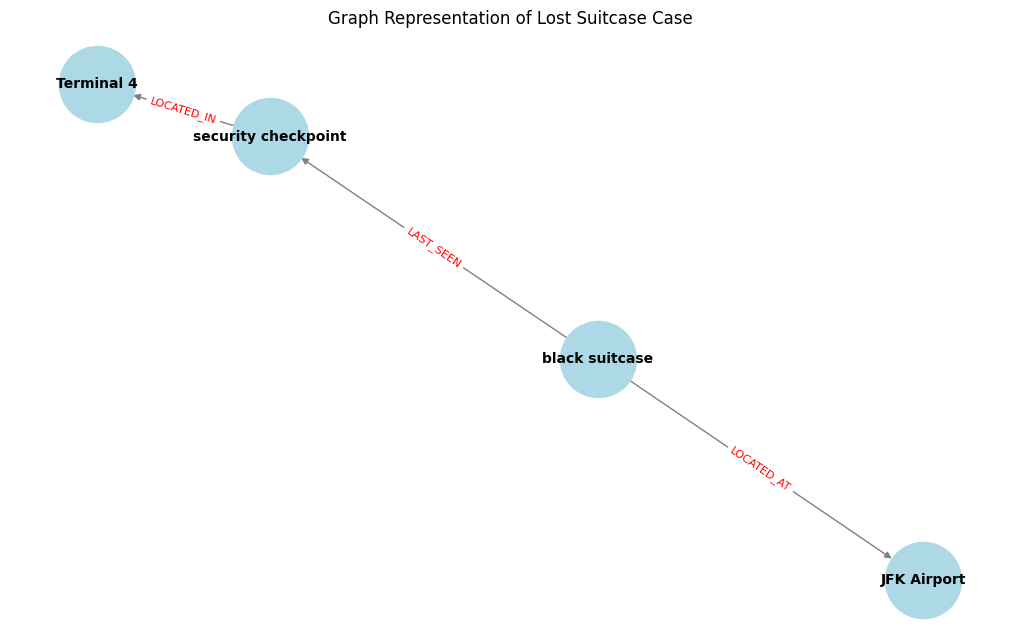

In [30]:
# Visualize the graph
def visualize_graph(graph):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph._graph)
    labels = nx.get_edge_attributes(graph._graph, 'relation')
    nx.draw(graph._graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph._graph, pos, edge_labels=labels, font_size=8, font_color='red')
    plt.title("Graph Representation of Lost Suitcase Case")
    plt.show()

# Call visualization function
visualize_graph(graph)

In [31]:
# Improved Input text - Lost suitcase scenario with clearer relationships
doc_text = """
Incident Report: Lost Suitcase at JFK Airport

John Doe, a traveler, reported losing his black Samsonite suitcase at JFK Airport on February 20th at 3:45 PM.
He last physically saw the suitcase at the security checkpoint in Terminal 4 at 3:30 PM before proceeding towards Gate B22 for his flight to London.

The suitcase was recorded on CCTV footage at 3:35 PM near the duty-free store, and at 3:40 PM near a coffee shop in Terminal 4.
At 3:50 PM, security footage showed an unknown individual picking up a suitcase near the coffee shop and walking towards the exit.

The airport authorities and security team are currently investigating the case, reviewing CCTV footage, and checking passenger logs to determine whether it was misplaced, stolen, or mistakenly taken by another passenger.
"""

documents = [Document(page_content=doc_text)]

# Initialize the Graph Transformer
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

# Filter Graph Transformer
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Person", "Item", "Location", "Event"],
    allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS", "PICKED_UP_BY"],
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# Create NetworkX Graph
graph = NetworkxEntityGraph()

# Manually add nodes and edges
for doc in graph_documents_filtered:
    for node in doc.nodes:
        graph._graph.add_node(node.id, type=node.type)
    for edge in doc.relationships:
        graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

# Debugging: Print extracted nodes and edges
print("Extracted Nodes:")
print(graph._graph.nodes(data=True))
print("\nExtracted Edges:")
print(graph._graph.edges(data=True))

# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

# Query the graph
question = "Where was John Doe's suitcase last seen?"
response = chain.run(question)
print("\nGraph Query Response:", response)



Extracted Nodes:
[('security checkpoint', {'type': 'Location'}), ('CCTV footage', {'type': 'Item'}), ('unknown individual', {'type': 'Person'}), ('duty-free store', {'type': 'Location'}), ('black Samsonite suitcase', {'type': 'Item'}), ('John Doe', {'type': 'Person'}), ('coffee shop', {'type': 'Location'}), ('suitcase', {'type': 'Item'}), ('passenger logs', {'type': 'Item'}), ('airport authorities', {'type': 'Person'})]

Extracted Edges:
[('unknown individual', 'suitcase', {'relation': 'PICKED_UP_BY'}), ('black Samsonite suitcase', 'security checkpoint', {'relation': 'LAST_SEEN_AT'}), ('black Samsonite suitcase', 'CCTV footage', {'relation': 'RECORDED_BY'}), ('black Samsonite suitcase', 'duty-free store', {'relation': 'LAST_SEEN_AT'}), ('black Samsonite suitcase', 'coffee shop', {'relation': 'LAST_SEEN_AT'}), ('John Doe', 'black Samsonite suitcase', {'relation': 'OWNED_BY'}), ('John Doe', 'security checkpoint', {'relation': 'LAST_SEEN_AT'}), ('airport authorities', 'CCTV footage', {'re

In [32]:

# Improved input text - lost suitcase scenario
doc_text = doc_text = """
Lost Luggage Report:
- Item: Black Suitcase
- Last Seen Location: Security checkpoint, Terminal 4, JFK Airport
- Last Seen Time: 3:30 PM
"""

documents = [Document(page_content=doc_text)]

# Retrieve allowed class names from remote endpoint
response = requests.get("http://34.136.67.113:1234/getAllClassNames")
data = response.json()
classNames = data["classNames"]
print("Allowed Class Names:", classNames)

# Initialize Graph Transformer (unfiltered)
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

# Filter Graph Transformer using allowed_nodes from classNames
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    # allowed_nodes=classNames,
    allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS", "PICKED_UP_BY"],
    # allowed_relationships can also be provided if needed
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# Create a NetworkX Graph
graph = NetworkxEntityGraph()

# Enforce allowed nodes by filtering out any node whose type isn't in the allowed set
allowed_set = set(classNames)

# Populate the graph dynamically, only including allowed nodes and edges
for doc in graph_documents_filtered:
    for node in doc.nodes:
        if node.type in allowed_set:
            graph._graph.add_node(node.id, type=node.type)
    for edge in doc.relationships:
        if edge.source.type in allowed_set and edge.target.type in allowed_set:
            graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

# Debugging: Print extracted nodes and edges
print("Extracted Nodes:")
print(graph._graph.nodes(data=True))
print("\nExtracted Edges:")
print(graph._graph.edges(data=True))

# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

# Query the graph
question = f"Where is the suitcase?"
response = chain.run(question)
print("\nGraph Query Response:", response)


Allowed Class Names: ['arachnid', 'armadillo', 'bear', 'bird', 'bug', 'butterfly', 'cat', 'coral', 'crocodile', 'crustacean', 'dinosaur', 'dog', 'echinoderms', 'ferret', 'fish', 'flower', 'frog', 'fruit', 'fungus', 'hog', 'lizard', 'marine mammals', 'marsupial', 'mollusk', 'mongoose', 'monotreme', 'person', 'plant', 'primate', 'rabbit', 'rodent', 'salamander', 'shark', 'sloth', 'snake', 'trilobite', 'turtle', 'ungulate', 'vegetable', 'wild cat', 'wild dog', 'accessory', 'aircraft', 'ball', 'boat', 'building', 'clothing', 'container', 'cooking', 'decor', 'electronics', 'fence', 'food', 'furniture', 'hat', 'instrument', 'lab equipment', 'other', 'outdoor scene', 'paper', 'sports equipment', 'technology', 'tool', 'toy', 'train', 'vehicle', 'weapon', 'croodile']
Extracted Nodes:
[]

Extracted Edges:
[]


> Entering new GraphQAChain chain...
Entities Extracted:
NONE
Full Context:


> Finished chain.

Graph Query Response: I need the knowledge triplets to answer the question "Where is the su

In [33]:
question = f"Choose a single best class that our item fits in from the the list of {classNames}, take this as context, {new_response}"
new_response = chain.run(question)
print("\nGraph Query Response:", response)

NameError: name 'new_response' is not defined

In [ ]:
# Visualize the graph
def visualize_graph(graph):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph._graph)
    labels = nx.get_edge_attributes(graph._graph, 'relation')
    nx.draw(graph._graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph._graph, pos, edge_labels=labels, font_size=8, font_color='red')
    plt.title("Graph Representation of Lost Suitcase Case")
    plt.show()

# Call visualization function
visualize_graph(graph)